# 2009

In [2]:
import pandas as pd

data = pd.read_csv(r'G:\social analysis\project\qajoin_2009.csv')

In [3]:
data=data.dropna(subset=['q_user','a_user'])
qusers = [x for x in data['q_user'].to_numpy()]
ausers = [x for x in data['a_user'].to_numpy()]
dic_q = {}
dic_a = {}
for i in qusers:
    dic_q[i] = dic_q.get(i,0) + 1
for i in ausers:
    dic_a[i] = dic_a.get(i,0) + 1
dic_users = {}
for i in list(dic_q.keys()) + list(dic_q.keys()):
    dic_users[i] = dic_q.get(i,0) + dic_a.get(i,0)


sort_users = sorted(dic_users.items(), key=lambda x: x[1], reverse=True)
sort_users = pd.DataFrame(sort_users,columns=['user','active'])
sort_users[:5]

,user,active
0,22656.0,5184
1,23354.0,3430
2,95810.0,2508
3,54964.0,2400
4,12950.0,2198


In [5]:
import pickle
with open(r"G:\social analysis\project\community_2009.pkl", 'rb') as f:
    community_2009 = pickle.load(f)

In [7]:
for k,v in community_2009.items():
    print(k,len(v))

0 656
1 2506
2 2999
3 5796
4 4239
5 989
6 268
7 165
8 17
9 11
10 2
11 2
12 2
13 1
14 1
15 1


In [8]:
top_community={}
for c in [0, 1, 2, 3, 4,5,6,7,8,9]:
    top_community[c]=community_2009[c]

In [9]:
top_community_countusers = {}
for c in [0, 1, 2, 3, 4,5,6,7,8,9]:
    top_community_countusers[c]=len(top_community[c])
sum_u = sum(top_community_countusers.values())
for c in [0, 1, 2, 3, 4,5,6,7,8,9]:
    top_community_countusers[c] = 2000* top_community_countusers[c]/sum_u

n= top_community_countusers[4]
top_community_countusers[4]=n*5/6
top_community_countusers[9]=n/6+top_community_countusers[9]

In [11]:
top_community_num={}
for c in  [0, 1, 2, 3, 4,5,6,7,8,9]:
    top_community_num[c]=[(user,sort_users[sort_users['user']==user].active.to_list()[0]) for user in top_community[c] if (user in sort_users['user'].to_list()) ]

In [12]:
for c in [0, 1, 2, 3, 4,5,6,7,8,9]:
    top_community_num[c] = sorted(top_community_num[c],key = lambda x: x[1], reverse=True)[:int(top_community_countusers[c])]

all_selected_users=[]
for c in [0, 1, 2, 3, 4,5,6,7,8,9]:
    all_selected_users.extend([x[0] for x in top_community_num[c]])

In [18]:
import matplotlib.pyplot as plt
import networkx as nx
g = nx.Graph()
for c in [0, 1, 2, 3, 4,5,6,7,8,9]:
    g.add_nodes_from([x[0] for x in top_community_num[c]],community=c)

data_new = data[(data['q_user'].isin(all_selected_users)) & (data['a_user'].isin(all_selected_users))] 
edges = [tuple(x) for x in data_new[['q_user','a_user']].to_numpy() if ((x[0] in g.nodes())&(x[1] in g.nodes())) ]
g.add_edges_from(edges)

In [20]:
delete_nodes=[n for n in all_selected_users if len(g.edges(n))<2 ]
g.remove_nodes_from(delete_nodes)

<IPython.core.display.Javascript object>


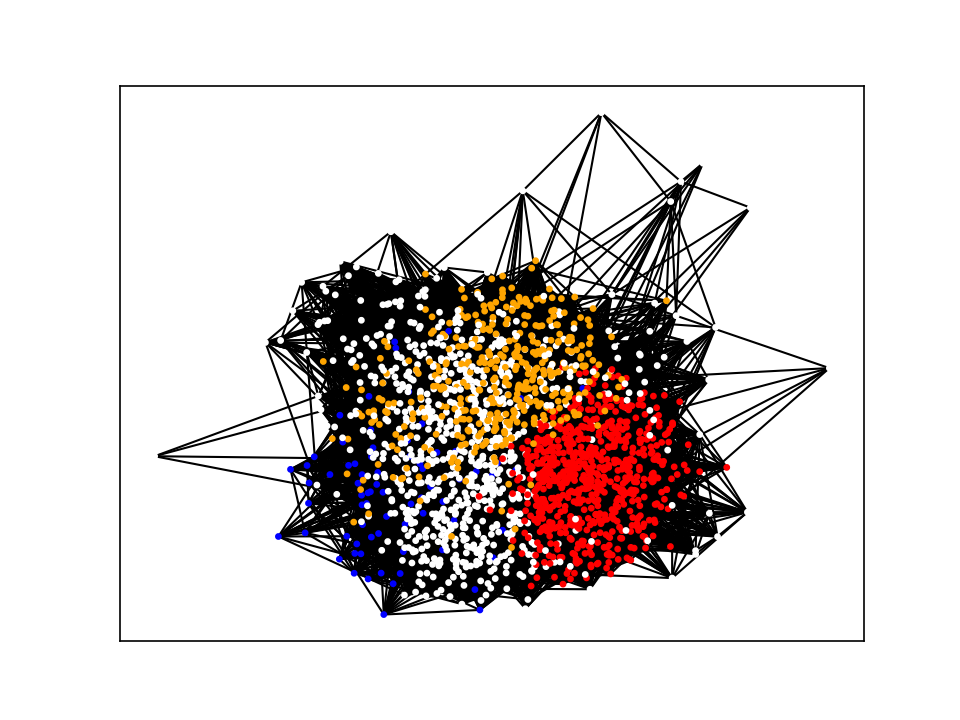

In [21]:
import matplotlib.cm as cm
# draw the graph
%matplotlib notebook
color_map = []
for node in g:
    if g.node[node]['community']==0:
        color_map.append('blue')
    elif g.node[node]['community']==1: 
        color_map.append('white')
    elif g.node[node]['community']==2: 
        color_map.append('white')
    elif g.node[node]['community']==3: 
        color_map.append('red')
    elif g.node[node]['community']==4: 
        color_map.append('orange')  
    elif g.node[node]['community']==5: 
        color_map.append('white')  
    elif g.node[node]['community']==6: 
        color_map.append('white')
    elif g.node[node]['community']==7: 
        color_map.append('white')  
    elif g.node[node]['community']==8: 
        color_map.append('white')  
    elif g.node[node]['community']==9: 
        color_map.append('white')
nx.draw_networkx(g,node_color =color_map ,with_labels = False,node_size=5,edge_size=0.01)
plt.show()

# 2012

In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv(r'G:\social analysis\project\qajoin_2012.csv')

In [41]:
data=data.dropna(subset=['q_user','a_user'])
qusers = [x for x in data['q_user'].to_numpy()]
ausers = [x for x in data['a_user'].to_numpy()]
dic_q = {}
dic_a = {}
for i in qusers:
    dic_q[i] = dic_q.get(i,0) + 1
for i in ausers:
    dic_a[i] = dic_a.get(i,0) + 1
dic_users = {}
for i in list(dic_q.keys()) + list(dic_q.keys()):
    dic_users[i] = dic_q.get(i,0) + dic_a.get(i,0)


sort_users = sorted(dic_users.items(), key=lambda x: x[1], reverse=True)
sort_users = pd.DataFrame(sort_users,columns=['user','active'])
sort_users[:5]

,user,active
0,22656.0,5685
1,29407.0,4766
2,157882.0,3475
3,57695.0,3417
4,571407.0,3383


In [42]:
with open(r"G:\social analysis\project\community_2012.pkl", 'rb') as f:
    community_2012 = pickle.load(f)
with open(r"G:\social analysis\project\tags_2012.pkl", 'rb') as f:
    tags = pickle.load(f)
for key,value in tags.items():
    print(key,value[:10])

0 [('php', 69747), ('jquery', 51572), ('javascript', 50903), ('html', 28627), ('css', 23162), ('mysql', 20234), ('ajax', 6415), ('arrays', 6154), ('sql', 4758), ('regex', 4053)]
3 [('c#', 83760), ('asp.net', 24565), ('.net', 21282), ('asp.net-mvc', 10040), ('sql', 10016), ('asp.net-mvc-3', 9200), ('sql-server', 9056), ('wpf', 8993), ('linq', 6765), ('jquery', 5737)]
1 [('c++', 37133), ('python', 28637), ('c', 14821), ('django', 6651), ('linux', 4639), ('perl', 3132), ('c++11', 2932), ('string', 2908), ('bash', 2805), ('algorithm', 2549)]
6 [('java', 60101), ('swing', 5057), ('spring', 5030), ('hibernate', 3282), ('scala', 3277), ('eclipse', 3254), ('maven', 2714), ('jsf', 2252), ('jakarta-ee', 2178), ('multithreading', 2139)]
2 [('android', 53959), ('java', 7752), ('android-layout', 4320), ('android-intent', 2113), ('sqlite', 1909), ('listview', 1870), ('android-activity', 1836), ('eclipse', 1692), ('android-listview', 1265), ('android-asynctask', 1102)]
4 [('ios', 37087), ('objective-

In [52]:
top_community={}
for c in [0, 1,2, 3, 4,5,6,7,8,9]:
    top_community[c]=community_2012[c]
top_community_countusers = {}
for c in  [0, 1,2, 3, 4,5,6,7,8,9]:
    top_community_countusers[c]=len(top_community[c])
sum_u = sum(top_community_countusers.values())

for c in  [0, 1,2, 3, 4,5,6,7,8,9]:
    top_community_countusers[c] = 2000* top_community_countusers[c]/sum_u

n= top_community_countusers[1]
top_community_countusers[1]=n*5/6   
top_community_countusers[9]=top_community_countusers[9]+n/6

In [53]:
top_community_num={}
for c in   [0, 1,2, 3, 4,5,6,7,8,9]:
    top_community_num[c]=[(user,sort_users[sort_users['user']==user].active.to_list()[0]) for user in top_community[c] if (user in sort_users['user'].to_list()) ]
for c in  [0, 1,2, 3, 4,5,6,7,8,9]:
    top_community_num[c] = sorted(top_community_num[c],key = lambda x: x[1], reverse=True)[:int(top_community_countusers[c])]

all_selected_users=[]
for c in [0, 1,2, 3, 4,5,6,7,8,9]:
    all_selected_users.extend([x[0] for x in top_community_num[c]])

In [54]:
import matplotlib.pyplot as plt
import networkx as nx
g = nx.Graph()
for c in [0, 1,2, 3, 4,5,6,7,8,9]:
    g.add_nodes_from([x[0] for x in top_community_num[c]],community=c)

data_new = data[(data['q_user'].isin(all_selected_users)) & (data['a_user'].isin(all_selected_users))] 
edges = [tuple(x) for x in data_new[['q_user','a_user']].to_numpy() if ((x[0] in g.nodes())&(x[1] in g.nodes())) ]
g.add_edges_from(edges)

In [ ]:
delete_nodes=[n for n in all_selected_users if len(g.edges(n))<2 ]
g.remove_nodes_from(delete_nodes)

<IPython.core.display.Javascript object>


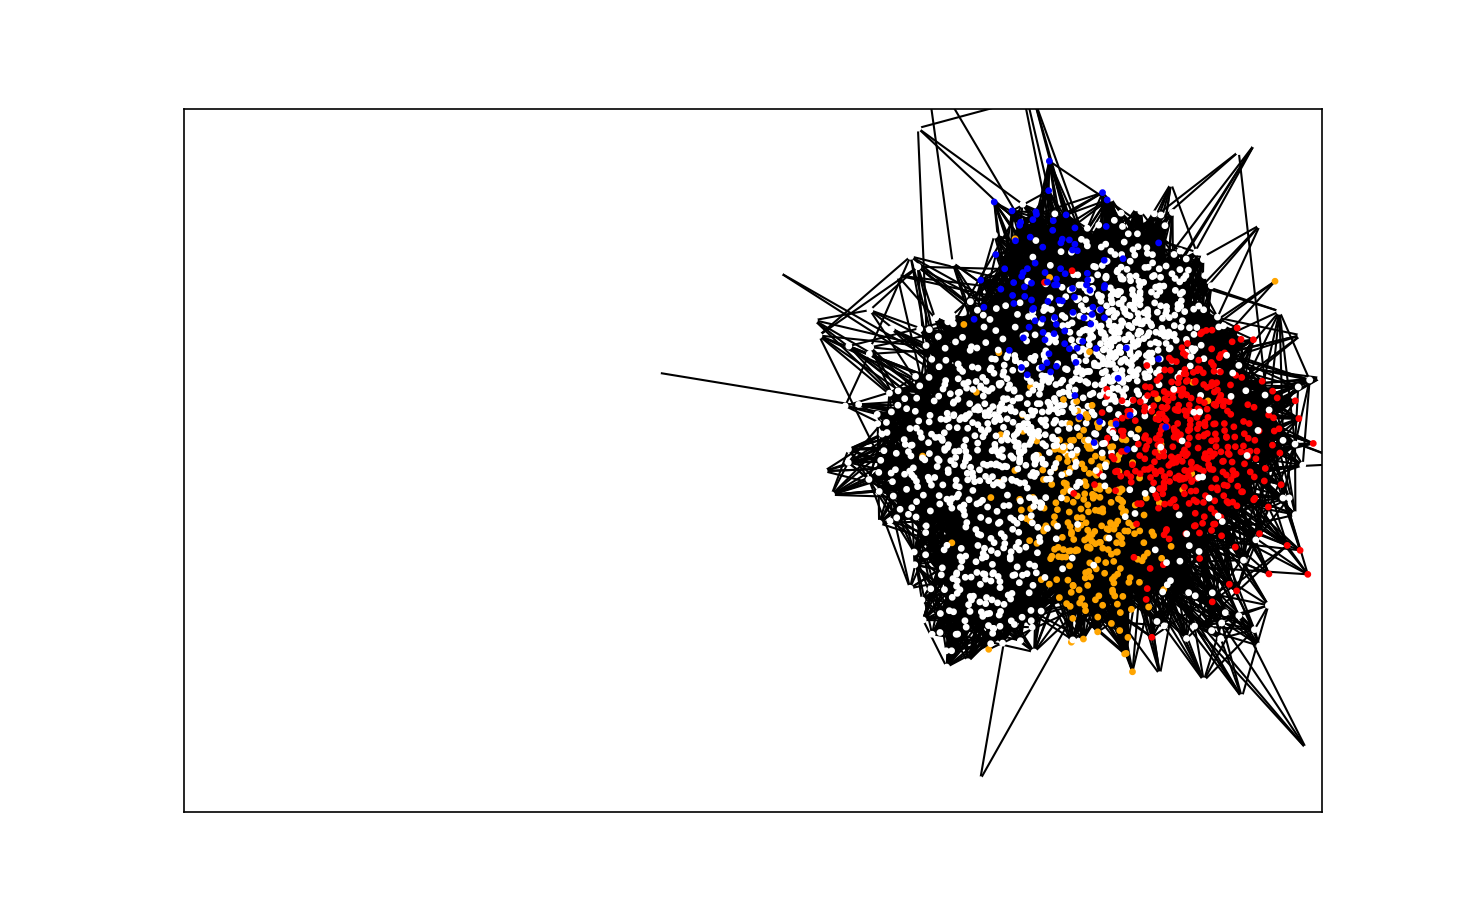

In [56]:
import matplotlib.cm as cm
# draw the graph
#%matplotlib notebook
color_map = []
for node in g:
    if g.node[node]['community']==0:
        color_map.append('white')
    elif g.node[node]['community']==1: 
        color_map.append('orange')
    elif g.node[node]['community']==2: 
        color_map.append('white')
    elif g.node[node]['community']==3: 
        color_map.append('red')
    elif g.node[node]['community']==4: 
        color_map.append('white')  
    elif g.node[node]['community']==5: 
        color_map.append('white')  
    elif g.node[node]['community']==6: 
        color_map.append('white')
    elif g.node[node]['community']==7: 
        color_map.append('blue')
    elif g.node[node]['community']==8: 
        color_map.append('white')
    elif g.node[node]['community']==9: 
        color_map.append('white')
nx.draw_networkx(g,node_color =color_map ,with_labels = False,node_size=5,edge_size=0.01)
plt.show()

# 2015

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('qajoin_2015.csv')
data=pd.DataFrame(data)
data=data.dropna(subset=['q_user','a_user'])
qusers = [x for x in data['q_user'].to_numpy()]
ausers = [x for x in data['a_user'].to_numpy()]
dic_q = {}
dic_a = {}
for i in qusers:
    dic_q[i] = dic_q.get(i,0) + 1
for i in ausers:
    dic_a[i] = dic_a.get(i,0) + 1
dic_users = {}
for i in list(dic_q.keys()) + list(dic_q.keys()):
    dic_users[i] = dic_q.get(i,0) + dic_a.get(i,0)
sort_users = sorted(dic_users.items(), key=lambda x: x[1], reverse=True)
sort_users = pd.DataFrame(sort_users,columns=['user','active'])


import pickle
with open("community_2015.pkl", 'rb') as f:
    community_2015 = pickle.load(f)
    
top6_community={}
for c in [3,6,9,0,8,7,2,10,1,11]:
    top6_community[c]=community_2015[c]
    
top6_community_countusers = {}
for c in [3,6,9,0,8,7,2,10,1,11]:
    top6_community_countusers[c]=len(top6_community[c])
sum_u = sum(top6_community_countusers.values())
for c in [3,6,9,0,8,7,2,10,1,11]:
    top6_community_countusers[c] = 2000* top6_community_countusers[c]/sum_u
    
top6_community_countusers

In [ ]:
top6_community_selected={}
for c in [3,6,9,0,8,7,2,10,1,11]:
    top6_community_selected[c] = sorted(top6_community_num[c],key = lambda x: x[1], reverse=True)[:int(top6_community_countusers[c])]
all_selected_users=[]
for c in [3,6,9,0,8,7,2,10,1,11]:
    all_selected_users.extend([x[0] for x in top6_community_selected[c]])
    
import matplotlib.pyplot as plt
import networkx as nx
g = nx.Graph()
for c in [3,6,9,0,8,7,2,10,1,11]:
    g.add_nodes_from([x[0] for x in top6_community_selected[c]],community=c)

data_new = data[(data['q_user'].isin(all_selected_users)) & (data['a_user'].isin(all_selected_users))] 
edges = [tuple(x) for x in data_new[['q_user','a_user']].to_numpy() if ((x[0] in eg.nodes())&(x[1] in eg.nodes())) ]
g.add_edges_from(edges)
delete_nodes=[n for n in all_selected_users if len(g.edges(n))<2 ]
g.remove_nodes_from(delete_nodes)

import matplotlib.cm as cm
# draw the graph
%matplotlib notebook
color_map = []
for node in g:
    if g.node[node]['community']==1:
        color_map.append('red')
    elif g.node[node]['community']==4: 
        color_map.append('green')
    elif g.node[node]['community']==4: 
        color_map.append('green')
    elif g.node[node]['community']==4: 
        color_map.append('green')
    elif g.node[node]['community']==4: 
        color_map.append('green')
    elif g.node[node]['community']==12: 
        color_map.append('blue')
    elif g.node[node]['community']==13: 
        color_map.append('yellow')
    elif g.node[node]['community']==7: 
        color_map.append('purple')  
    elif g.node[node]['community']==6: 
        color_map.append('pink')  

nx.draw_networkx(g,node_color =color_map ,with_labels = False,node_size=5,edge_size=0.5)
plt.show()

# 2018

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('qajoin_2018.csv')

data=pd.DataFrame(data)
data=data.dropna(subset=['q_user','a_user'])

qusers = [x for x in data['q_user'].to_numpy()]
ausers = [x for x in data['a_user'].to_numpy()]
dic_q = {}
dic_a = {}
for i in qusers:
    dic_q[i] = dic_q.get(i,0) + 1
for i in ausers:
    dic_a[i] = dic_a.get(i,0) + 1
dic_users = {}
for i in list(dic_q.keys()) + list(dic_q.keys()):
    dic_users[i] = dic_q.get(i,0) + dic_a.get(i,0)
    
sort_users = sorted(dic_users.items(), key=lambda x: x[1], reverse=True)
sort_users = pd.DataFrame(sort_users,columns=['user','active'])

import pickle
with open("community_2018.pkl", 'rb') as f:
    community_2018 = pickle.load(f)
    
top6_community={}
for c in [1,4,12,13,7,6]:
    top6_community[c]=community_2018[c]
    
top6_community_countusers = {}
for c in [1,4,12,13,7,6]:
    top6_community_countusers[c]=len(top6_community[c])
sum_u = sum(top6_community_countusers.values())
for c in [1,4,12,13,7,6]:
    top6_community_countusers[c] = 2000* top6_community_countusers[c]/sum_u
    
top6_community_num={}
for c in [1,4,12,13,7,6]:
    top6_community_num[c]=[(user,sort_users[sort_users['user']==user].active.to_numpy()[0]) for user in top6_community[c]]
    
top6_community_selected={}
for c in [1,4,12,13,7,6]:
    top6_community_selected[c] = sorted(top6_community_num[c],key = lambda x: x[1], reverse=True)[:int(top6_community_countusers[c])]
    
all_selected_users=[]
for c in [1,4,12,13,7,6]:
    all_selected_users.extend([x[0] for x in top6_community_selected[c]])
    
import matplotlib.pyplot as plt
import networkx as nx
g = nx.Graph()
for c in [1,4,12,13,7,6]:
    g.add_nodes_from([x[0] for x in top6_community_selected[c]],community=c)

data_new = data[(data['q_user'].isin(all_selected_users)) & (data['a_user'].isin(all_selected_users))] 
edges = [tuple(x) for x in data_new[['q_user','a_user']].to_numpy() if ((x[0] in eg.nodes())&(x[1] in eg.nodes())) ]
g.add_edges_from(edges)

delete_nodes=[n for n in all_selected_users if len(g.edges(n))<2 ]
g.remove_nodes_from(delete_nodes)

import matplotlib.cm as cm
# draw the graph
%matplotlib notebook
color_map = []
for node in g:
    if g.node[node]['community']==1:
        color_map.append('red')
    elif g.node[node]['community']==4: 
        color_map.append('green')
    elif g.node[node]['community']==12: 
        color_map.append('blue')
    elif g.node[node]['community']==13: 
        color_map.append('yellow')
    elif g.node[node]['community']==7: 
        color_map.append('purple')  
    elif g.node[node]['community']==6: 
        color_map.append('pink')  

nx.draw_networkx(g,node_color =color_map ,with_labels = False,node_size=5,edge_size=0.5)
plt.show()

# 2020

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv(r'G:\social analysis\project\qajoin_2020.csv')

In [2]:
#data=pd.DataFrame(data)
data=data.dropna(subset=['q_user','a_user'])
# data['q_user']=data['q_user'].astype(str)
# data['a_user']=data['a_user'].astype(str)

In [3]:
qusers = [x for x in data['q_user'].to_numpy()]
ausers = [x for x in data['a_user'].to_numpy()]
dic_q = {}
dic_a = {}
for i in qusers:
    dic_q[i] = dic_q.get(i,0) + 1
for i in ausers:
    dic_a[i] = dic_a.get(i,0) + 1
dic_users = {}
for i in list(dic_q.keys()) + list(dic_q.keys()):
    dic_users[i] = dic_q.get(i,0) + dic_a.get(i,0)

In [4]:
sort_users = sorted(dic_users.items(), key=lambda x: x[1], reverse=True)
sort_users = pd.DataFrame(sort_users,columns=['user','active'])
sort_users[:5]

,user,active
0,2901002.0,2692
1,3962914.0,2534
2,807126.0,1493
3,12299030.0,1325
4,1863229.0,1070


In [5]:
import pickle
with open(r"G:\social analysis\project\community_2020.pkl", 'rb') as f:
    community_2020 = pickle.load(f)

In [6]:
community_2020.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164])

In [7]:
top6_community={}
for c in [1,3,4,5,6,7,10,12,13,20]:
    top6_community[c]=community_2020[c]

In [8]:
top6_community_countusers = {}
for c in [1,3,4,5,6,7,10,12,13,20]:
    top6_community_countusers[c]=len(top6_community[c])
sum_u = sum(top6_community_countusers.values())
for c in [1,3,4,5,6,7,10,12,13,20]:
    top6_community_countusers[c] = 2000* top6_community_countusers[c]/sum_u
top6_community_countusers

{1: 424.64114832535887,
 3: 137.9585326953748,
 4: 379.9840510366826,
 5: 149.12280701754386,
 6: 167.8628389154705,
 7: 167.8628389154705,
 10: 127.59170653907496,
 12: 179.02711323763955,
 13: 173.44497607655504,
 20: 92.50398724082935}

In [9]:
top6_community_num={}
for c in [1,3,4,5,6,7,10,12,13,20]:
    top6_community_num[c]=[(user,sort_users[sort_users['user']==user].active.to_numpy()[0]) for user in top6_community[c] if (user in sort_users['user'].to_list()) ]

In [10]:
top6_community_selected={}
for c in [1,3,4,5,6,7,10,12,13,20]:
    top6_community_selected[c] = sorted(top6_community_num[c],key = lambda x: x[1], reverse=True)[:int(top6_community_countusers[c])]

In [11]:
all_selected_users=[]
for c in [1,3,4,5,6,7,10,12,13,20]:
    all_selected_users.extend([x[0] for x in top6_community_selected[c]])

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
g = nx.Graph()
for c in [1,3,4,5,6,7,10,12,13,20]:
    g.add_nodes_from([x[0] for x in top6_community_selected[c]],community=c)

data_new = data[(data['q_user'].isin(all_selected_users)) & (data['a_user'].isin(all_selected_users))] 
edges = [tuple(x) for x in data_new[['q_user','a_user']].to_numpy() if ((x[0] in g.nodes())&(x[1] in g.nodes())) ]
g.add_edges_from(edges)

In [14]:
delete_nodes=[n for n in all_selected_users if len(g.edges(n))<2 ]
g.remove_nodes_from(delete_nodes)

<IPython.core.display.Javascript object>


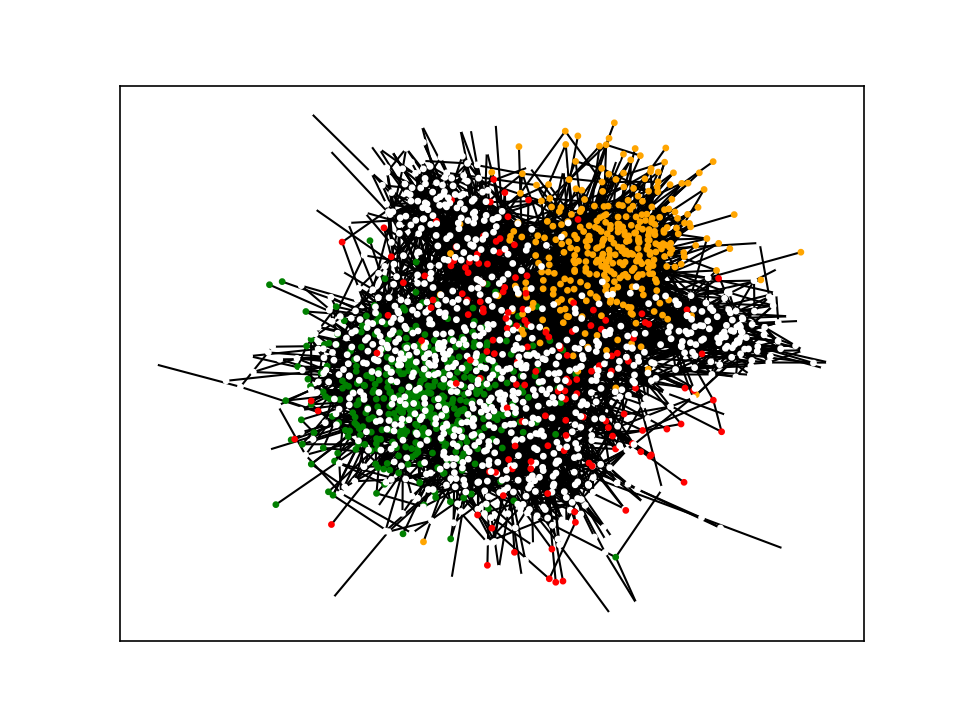

In [23]:
import matplotlib.cm as cm
# draw the graph
%matplotlib notebook 
color_map = []
for node in g:
    if g.node[node]['community']==1:
        color_map.append('green')
    elif g.node[node]['community']==3: 
        color_map.append('white')
    elif g.node[node]['community']==4: 
        color_map.append('orange')
    elif g.node[node]['community']==5: 
        color_map.append('white')
    elif g.node[node]['community']==6: 
        color_map.append('white')  
    elif g.node[node]['community']==7: 
        color_map.append('red')  
    elif g.node[node]['community']==10: 
        color_map.append('white')
    elif g.node[node]['community']==12: 
        color_map.append('white')
    elif g.node[node]['community']==13: 
        color_map.append('white')  
    elif g.node[node]['community']==20: 
        color_map.append('white') 
nx.draw_networkx(g,node_color =color_map ,with_labels = False,node_size=5,edge_size=0.5)
plt.show()

In [ ]:
nx.draw(g, pos, node_color = nx.get_node_attributes(g,'community'), vmin=0, vmax=4, cmap = plt.cm.get_cmap('rainbow'))

# ego

In [167]:
top6_community_countusers = {}
for c in [1,4,12,13,7,6]:
    top6_community_countusers[c]=len(top6_community[c])
sum_u = sum(top6_community_countusers.values())
for c in [1,4,12,13,7,6]:
    top6_community_countusers[c] = 100* top6_community_countusers[c]/sum_u
top6_community_countusers

{1: 28.44551282051282,
 4: 25.45405982905983,
 12: 11.992521367521368,
 13: 11.618589743589743,
 7: 11.24465811965812,
 6: 11.24465811965812}

In [168]:
from functools import reduce
top6_community_ego={}
for c in [1,4,12,13,7,6]:
    top6_community_ego[c] =[x[0] for x in sorted(top6_community_num[c],key = lambda x: x[1], reverse=True)[:int(top6_community_countusers[c])]]
ego_nodes=reduce(lambda x,y: x+y,top6_community_ego.values())

In [169]:
import matplotlib.pyplot as plt
import networkx as nx
eg = nx.Graph()
eg_data = data[(data['q_user'].isin(ego_nodes)) | (data['a_user'].isin(ego_nodes))]

# for c in [1,4,12,13,7,6]:
#     eg.add_nodes_from([x[0] for x in top6_community_selected[c]],community=c)

for c in [1,4,12,13,7,6]:
    eg.add_nodes_from([n for n in set(eg_data['q_user'].to_list()+eg_data['a_user'].to_list()) if n in community_2020[c]],community=c)
edges = [tuple(x) for x in eg_data[['q_user','a_user']].to_numpy() if ((x[0] in eg.nodes())&(x[1] in eg.nodes()))]
eg.add_edges_from(edges)

In [170]:
print(eg.number_of_nodes(),eg.number_of_edges())

1889 3342


In [99]:
import matplotlib
#%matplotlib notebook
nx.draw(eg, with_labels=False,node_size=30,edge_color='red',edge_size=3)
# nx.draw(g, node_color='green', edge_color='blue',width=weights)
plt.show()

<IPython.core.display.Javascript object>


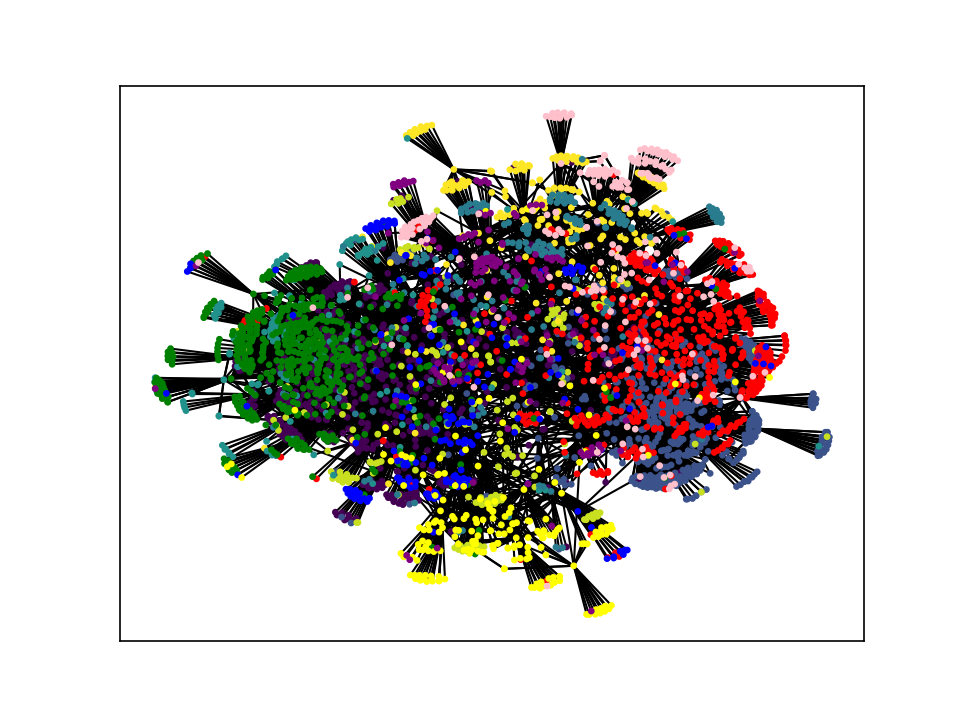

In [178]:
import matplotlib.cm as cm
# draw the graph
%matplotlib notebook
#node_color = [eg.node[node]['community'] for node in eg]
cmap = plt.cm.get_cmap('rainbow')
nx.draw_networkx(eg,node_color = [eg.node[node]['community'] for node in eg],with_labels = False,node_size=5,edge_size=0.01)
plt.show()

In [179]:
node_color = [eg.node[node]['community'] for node in eg]

<IPython.core.display.Javascript object>


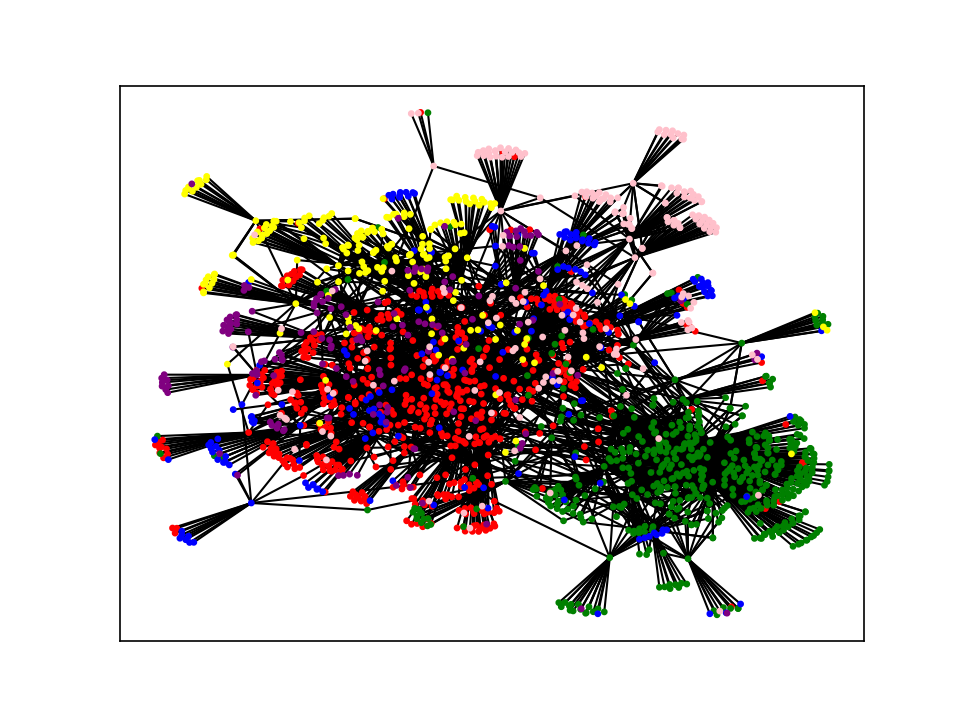

In [187]:
color_map = []
for node in eg:
    if eg.node[node]['community']==1:
        color_map.append('red')
    elif eg.node[node]['community']==4: 
        color_map.append('green')
    elif eg.node[node]['community']==12: 
        color_map.append('blue')
    elif eg.node[node]['community']==13: 
        color_map.append('yellow')
    elif eg.node[node]['community']==7: 
        color_map.append('purple')  
    elif eg.node[node]['community']==6: 
        color_map.append('pink')    
nx.draw_networkx(eg,node_color = color_map,with_labels = False,node_size=5,edge_size=0.01)
plt.show()